In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [2]:
##Virginia

# df_rs = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_remotedata.csv')
##Above: needs to be merged with biomass data (df_sum)
# df1 = pd.merge(df_rs, df_sum, how = 'right')

vdfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_yr.csv')
# dfw = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_octnov.csv') ##BAD
vdfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_augoct.csv')
vdfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_sepoct.csv')
# dfz = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_oct.csv') ##BAD

vdfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

# dfw.rename(
#     columns={
#         'ndvi':'ndvi_octnov','savi':'savi_octnov','wdrvi5':'wdrvi5_octnov','nd_r_g':'nd_r_g_octnov', 'nd_g_b':'nd_g_b_octnov',
#         'nd_swir2_nir':'nd_swir2_nir_octnov', 'nd_swir2_r':'nd_swir2_r_octnov'
#     }, inplace=True
# )

vdfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

vdfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)


# df9 = pd.merge(dfw, dfv, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df8 = pd.merge(dfx, dfy, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df0 = pd.merge(df9, df8, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df1 = pd.merge(dfz, df0, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')

# df0 = pd.merge(dfx, dfy, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')
# df1 = pd.merge(dfz, df0, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')

vdf0 = pd.merge(vdfv, vdfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf1 = pd.merge(vdf0, vdfy, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf1['ident'] = vdf1['ndvi_yr'] * vdf1['ndvi_augoct'] * vdf1['ndvi_sepoct']

vdf1['LTER'] = 'VA'
vdf1.rename(columns={'elevation':'Elevation'}, inplace=True)

display(vdf1)

,Year,locationID,Latitude,liveMass,Longitude,Transect,N,B2,B3,B4,...,nd_swir2_r_augoct,ndvi_sepoct,savi_sepoct,wdrvi5_sepoct,nd_r_g_sepoct,nd_g_b_sepoct,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ident,LTER
0,1999,1,37.167147,46.72,-75.940768,A,2,0.052050,0.054175,0.086750,...,-0.066493,0.250916,0.067466,-0.089940,-0.020359,0.132979,-0.312200,-0.066493,0.014553,VA
1,1999,1,37.174764,399.68,-75.942417,A,2,0.053340,0.054900,0.098160,...,-0.009877,0.306192,0.087636,-0.030227,0.036755,0.151515,-0.315115,-0.009877,0.026498,VA
2,1999,1,37.180976,441.68,-75.940766,A,2,0.057950,0.057875,0.115750,...,-0.003375,0.414314,0.145102,0.093956,-0.029380,0.183980,-0.417105,-0.003375,0.057219,VA
3,1999,1,37.287699,669.60,-75.929487,A,2,0.053940,0.054620,0.150000,...,0.176107,0.618321,0.273957,0.358974,-0.017199,0.269939,-0.496251,0.176107,0.178212,VA
4,1999,1,37.345970,875.52,-75.901065,A,2,0.075975,0.079763,0.149487,...,0.108817,0.424025,0.178325,0.105620,0.035055,0.163515,-0.330456,0.108817,0.054684,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2017,3,37.287875,96.08,-75.929008,B,2,0.036187,0.054947,0.049860,...,0.252567,0.686454,0.372871,0.457896,-0.044039,0.186089,-0.488264,0.298107,0.324417,VA
1004,2017,3,37.167768,26.56,-75.944280,C,2,0.053407,0.070279,0.076121,...,0.194727,0.422785,0.215164,0.104126,0.051064,0.134860,-0.216045,0.227521,0.080676,VA
1005,2017,3,37.449973,279.36,-75.671952,C,1,0.038233,0.049422,0.048778,...,0.234450,0.663949,0.349052,0.424582,-0.077966,0.155104,-0.508682,0.234450,0.261523,VA
1006,2018,1,37.396051,255.04,-75.876056,C,1,0.050643,0.067657,0.072257,...,0.220411,0.551863,0.309689,0.267790,-0.006429,0.155593,-0.377351,0.220411,0.149712,VA


In [3]:
##Georgia

gdfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_yr.csv')
gdfw = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_octnov.csv')
gdfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_augoct.csv')
gdfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_sepoct.csv')
gdfz = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_oct.csv')

gdfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

gdfw.rename(
    columns={
        'ndvi':'ndvi_octnov','savi':'savi_octnov','wdrvi5':'wdrvi5_octnov','nd_r_g':'nd_r_g_octnov', 'nd_g_b':'nd_g_b_octnov',
        'nd_swir2_nir':'nd_swir2_nir_octnov', 'nd_swir2_r':'nd_swir2_r_octnov'
    }, inplace=True
)

gdfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

gdfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

gdf0 = pd.merge(gdfv, gdfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf1 = pd.merge(gdfy, gdf0, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf1['LTER'] = 'GA'

gdf1['ident'] = gdf1['ndvi_yr'] * gdf1['ndvi_augoct'] * gdf1['ndvi_sepoct']

gdf1.rename(columns={'Plant_Biomass':'liveMass'}, inplace=True)
gdf1.rename(columns={'elevation':'Elevation'}, inplace=True)

gdf1 = gdf1[gdf1['Species_Code'] == 'A1'] ##Critical step

display(gdf1)

,Site,Species_Code,Year,Zone,Plot,Latitude,liveMass,Sample_Size,Longitude,Date,...,nd_swir2_r_yr,ndvi_augoct,savi_augoct,wdrvi5_augoct,nd_r_g_augoct,nd_g_b_augoct,nd_swir2_nir_augoct,nd_swir2_r_augoct,LTER,ident
0,1,A1,2000,1,1,31.538627,516.324,23,-81.422539,10/11/2000,...,0.057010,0.344495,0.104618,0.012609,-0.020024,0.074442,-0.274221,0.077605,GA,0.031942
1,3,A1,2000,1,1,31.518920,710.396,20,-81.228956,10/18/2000,...,-0.136931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,NaN
2,4,A1,2000,1,1,31.451676,1534.304,25,-81.365498,10/10/2000,...,-0.041900,0.294807,0.085244,-0.042724,0.034398,0.110169,-0.399095,-0.118194,GA,0.024241
3,5,A1,2000,1,1,31.436090,2022.264,25,-81.339919,10/10/2000,...,0.080958,0.450495,0.194444,0.137864,-0.059056,0.189841,-0.409557,0.050200,GA,0.082770
4,6,A1,2000,1,1,31.388423,1032.632,20,-81.279792,10/12/2000,...,-0.056655,0.260504,0.123864,-0.079755,-0.010095,0.080531,-0.405237,-0.161814,GA,0.023687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,9,A1,2019,1,53,31.351949,933.732,32,-81.333980,10/7/2019,...,-0.155181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,NaN
2854,8,A1,2019,1,55,31.307693,630.588,7,-81.415592,10/8/2019,...,-0.088655,0.393158,0.155020,0.068847,0.019793,0.244764,-0.502268,-0.135958,GA,0.042237
2855,4,A1,2019,1,56,31.451282,820.556,12,-81.366151,10/4/2019,...,0.056569,0.394861,0.135206,0.070854,-0.035560,0.219543,-0.399593,-0.005618,GA,0.063275
2856,6,A1,2019,1,64,31.388000,295.636,8,-81.279858,10/9/2019,...,-0.053637,0.321655,0.113682,-0.013081,-0.014609,0.130777,-0.448276,-0.147955,GA,0.036468


In [4]:
#Combining the datasets

df1 = pd.concat([gdf1, vdf1])

df1 = df1[df1['ident'].notna()] ##remove rows with NaN for columns used in the model 

display(df1)

,Site,Species_Code,Year,Zone,Plot,Latitude,liveMass,Sample_Size,Longitude,Date,...,wdrvi5_augoct,nd_r_g_augoct,nd_g_b_augoct,nd_swir2_nir_augoct,nd_swir2_r_augoct,LTER,ident,locationID,Transect,N
0,1.0,A1,2000,1.0,1.0,31.538627,516.324,23.0,-81.422539,10/11/2000,...,0.012609,-0.020024,0.074442,-0.274221,0.077605,GA,0.031942,NaN,NaN,NaN
2,4.0,A1,2000,1.0,1.0,31.451676,1534.304,25.0,-81.365498,10/10/2000,...,-0.042724,0.034398,0.110169,-0.399095,-0.118194,GA,0.024241,NaN,NaN,NaN
3,5.0,A1,2000,1.0,1.0,31.436090,2022.264,25.0,-81.339919,10/10/2000,...,0.137864,-0.059056,0.189841,-0.409557,0.050200,GA,0.082770,NaN,NaN,NaN
4,6.0,A1,2000,1.0,1.0,31.388423,1032.632,20.0,-81.279792,10/12/2000,...,-0.079755,-0.010095,0.080531,-0.405237,-0.161814,GA,0.023687,NaN,NaN,NaN
5,9.0,A1,2000,1.0,1.0,31.352109,1484.164,20.0,-81.333734,10/16/2000,...,0.064135,-0.030818,0.217064,-0.383589,0.006536,GA,0.051182,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,NaN,NaN,2017,NaN,NaN,37.287875,96.080,NaN,-75.929008,NaN,...,0.484748,-0.083123,0.225420,-0.549450,0.252567,VA,0.324417,3.0,B,2.0
1004,NaN,NaN,2017,NaN,NaN,37.167768,26.560,NaN,-75.944280,NaN,...,0.129681,0.037411,0.147155,-0.272668,0.194727,VA,0.080676,3.0,C,2.0
1005,NaN,NaN,2017,NaN,NaN,37.449973,279.360,NaN,-75.671952,NaN,...,0.424582,-0.077966,0.155104,-0.508682,0.234450,VA,0.261523,3.0,C,1.0
1006,NaN,NaN,2018,NaN,NaN,37.396051,255.040,NaN,-75.876056,NaN,...,0.267790,-0.006429,0.155593,-0.377351,0.220411,VA,0.149712,1.0,C,1.0


Mean Absolute Error: 277.83306426386474
Mean Squared Error: 163725.41238966523
Root Mean Squared Error: 404.6299697126564
The r squared is: 0.3212332390816417
0.3212332390816417
testing r2 is: 0.3212332390816417
training r2 is: 0.8988822407416404
NRMSE is: 0.11622248313740019
MEAN BASELINE:
Mean Absolute Error: 356.15688627513896
Root Mean Squared Error: 491.70559288392764


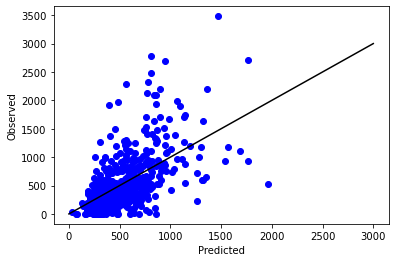

test data correlation coefficient is: 0.5668956081597092
train data correlation coefficient is: 0.9640589659082552


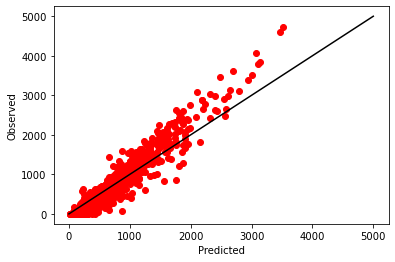

In [6]:
##Machine learning
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

xargs=df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_sepoct',
        'savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct','nd_swir2_nir_sepoct', 'nd_swir2_r_sepoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr'
    ]
]
#removed: 'nd_r_g','dayl','sn_prcp', 'sn_dayl', 'sn_srad', 'sn_vp', 'vp', 'srad', 'prcp'
##DOY!!!

# ##Include lag variables (e.g. lag ndvi), precip, temp, more

yargs=df1['liveMass'] 

size_x = 0.2
seed = 1
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

# Pipeline example:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=100, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, pred)))
r_square = metrics.r2_score(yargs_test, pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test,pred_mean)))

plt.scatter(pred, yargs_test, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 3000], [0, 3000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))


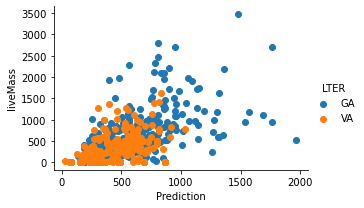

In [8]:
##Showing predicted vs. observed at each LTER site

import seaborn as sns

xxx = pd.DataFrame(data = [pred, yargs_test]).T
xxx.columns = ['Prediction', 'liveMass']

yyy = pd.merge(df1, xxx, how = 'left')

y_hats = pipe.predict(xargs)
df1['y_hats'] = y_hats

g = sns.FacetGrid(data=yyy, hue='LTER', aspect=1.5)
g.map(plt.scatter, 'Prediction', 'liveMass').add_legend()

##But this plot includes training data too, which will make it look better

In [15]:
##k-fold cross validation; random forest

predictors = df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_sepoct',
        'savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct','nd_swir2_nir_sepoct', 'nd_swir2_r_sepoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr'
    ]
]

targets = df1['liveMass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston

X, y = predictors, targets
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

{'fit_time': array([2.30517149, 2.20264077, 2.21826148, 2.21825671, 2.14015555]),
 'score_time': array([0.0156219 , 0.01562357, 0.01562738, 0.01562238, 0.01562214]),
 'test_r2': array([0.24236857, 0.32079856, 0.39170924, 0.35286473, 0.40039526]),
 'test_neg_root_mean_squared_error': array([-443.58346682, -413.83239041, -472.12249807, -391.67185217,
        -421.9917657 ])}

In [13]:
#Seems very highly dependent on elevation

#Average RMSE
print(np.mean(([-423.78898883, -384.51112565, -407.65705117, -447.19120042, -471.46228441])))

-426.922130096
